In [1]:
# Importing the dependencies

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [4]:
wine_df = pd.read_csv('content/winequality-red.csv')

In [5]:
wine_df.shape

(1599, 12)

In [6]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# Checking for missing values in dataset

wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# data Analysins and visualization

In [10]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


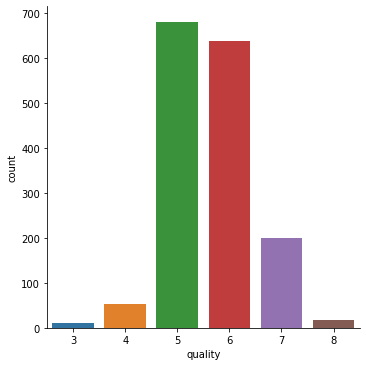

In [11]:
# number of values for each quality

sns.catplot(x = 'quality', data=wine_df, kind = 'count')

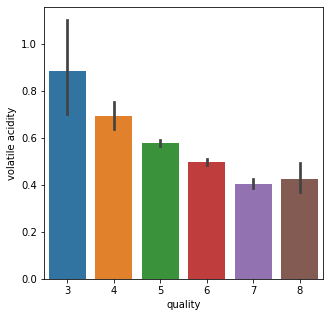

In [12]:
# volatile acidity vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y ='volatile acidity', data = wine_df )

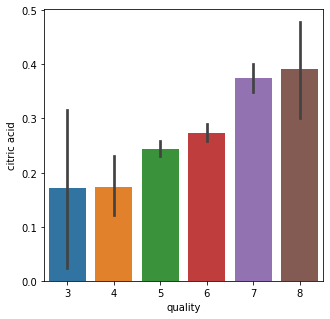

In [13]:
# citric acidity vs Quality

plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y ='citric acid', data = wine_df )

Correlation

In [14]:
corr = wine_df.corr()

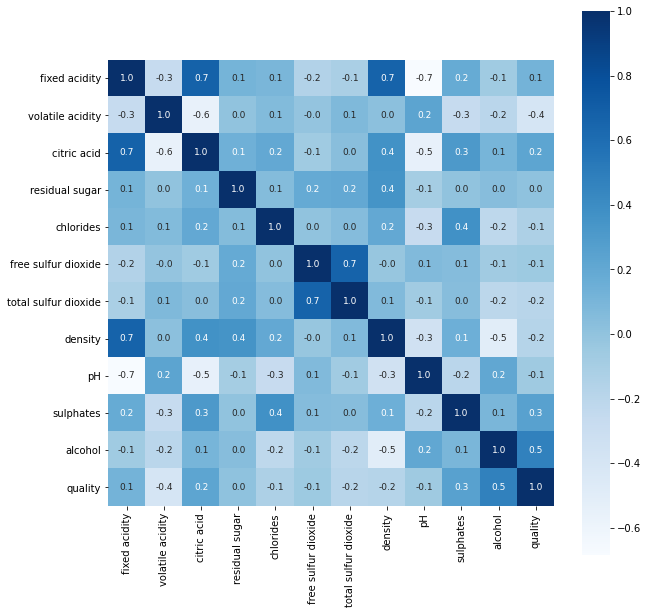

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True, square= True, fmt='.1f', annot= True, annot_kws={'size': 9}, cmap='Blues')

Data Processing

In [17]:
x = wine_df.drop(columns ='quality', axis = 1)
y = wine_df['quality']

In [18]:
# #label Binarization 
# if the value of quality is less then 6 the it will marked as bad else
# greater then 6 will be marked as good

In [19]:
y = wine_df['quality'].apply(lambda y_value : 1 if y_value > 6 else 0)

In [23]:
 #Test and train data

 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 2)

In [24]:
# Model training

# Random Forest Classifier


In [25]:
model = RandomForestClassifier()

In [26]:
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [27]:
# Model Evaluation

In [29]:
# Accuracy on test data 

y_test_prediction = model.predict(x_test)

test_data_accuracy = accuracy_score(y_test_prediction, y_test)

In [30]:
print(test_data_accuracy)

0.921875
